## _Supervised Learning:   Random Forest Classifier, Linear Classifier_

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
df = pd.read_csv('credit_approval.csv')

In [4]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  690 non-null    int64  
 1   1           690 non-null    int64  
 2   2           690 non-null    float64
 3   3           690 non-null    float64
 4   4           690 non-null    int64  
 5   5           690 non-null    int64  
 6   6           690 non-null    int64  
 7   7           690 non-null    float64
 8   8           690 non-null    int64  
 9   9           690 non-null    int64  
 10  10          690 non-null    int64  
 11  11          690 non-null    int64  
 12  12          690 non-null    int64  
 13  13          690 non-null    int64  
 14  14          690 non-null    int64  
 15  15          690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [6]:
df.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')

### Exploring Data

In [7]:
import matplotlib.pyplot as plt

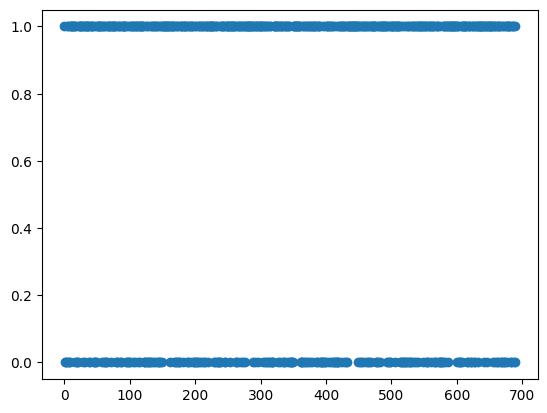

In [8]:
# Categorical attributes

plt.scatter(range(len(df)), df['1'])

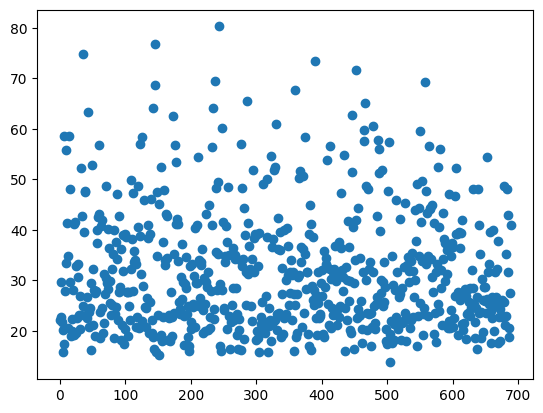

In [9]:
# Numerical attributes

plt.scatter(range(len(df)), df['2'])

### Preprocessing

### Task 0

**a)** Rename the first 14th (relevant) columns as `col1`, `col2` ... `col14` and the last column as `target`. Your function should return both the data corresponding to the _X values_ and the _Y values_.

_Hint:_ You can use the `drop` function explained [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to eliminate the first column.

In [17]:
def clean_df(df):
    
    df = df.drop('Unnamed: 0', axis = 1)
    
    df.columns = [f'col{i+1}' for i in range(14)] + ['target']
    
    X = df.drop('target', axis = 1)
    Y = df['target'] 
     
    return X, Y

In [18]:
dataX, dataY = clean_df(df)

In [19]:
# Verify result
dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


**b)** Which columns could be classified as categorical? Plot one column of your choice containing numerical values. Justify your choice (please use the `markdown` option provided in your notebook).

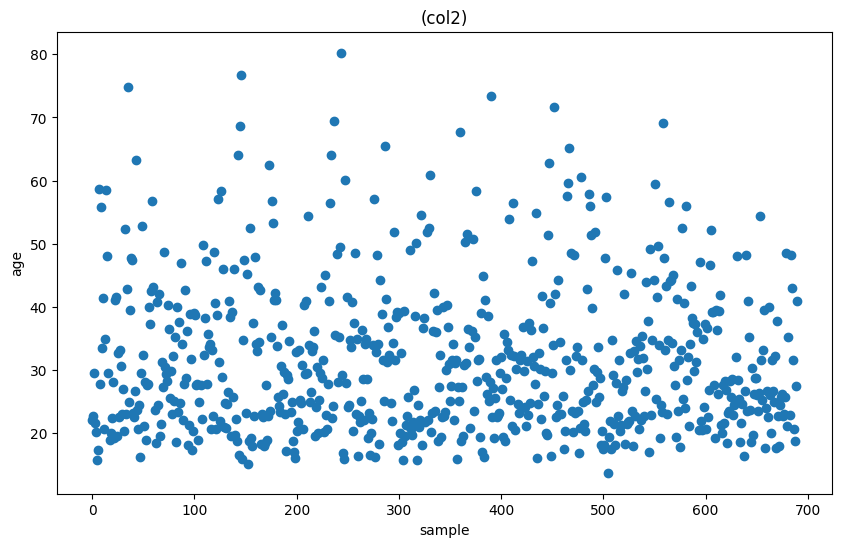

In [21]:
# TO DO: 
plt.figure(figsize=(10,6))
plt.scatter(range(len(dataX)), dataX['col2'])
plt.title('(col2)')
plt.ylabel('age')
plt.xlabel('sample')
plt.show()


Col2 can be plotted, as it it a numerical var with unique values and age is a cont var

In [22]:
# Verify result
dataY.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

**c)** Does the data stored in the `target` data frame have numerical attributes? Besides the graphical representation, how can the values of a column be classified as numerical or categorical?

In [23]:
# TO DO:
dataY.unique()

array([0, 1], dtype=int64)

In [24]:
dataY.nunique()

2

In [25]:
dataY.dtype

dtype('int64')

In [26]:
dataY.value_counts()

target
0    383
1    307
Name: count, dtype: int64

target - categorical, containing 2 vals, representing disting categ, no numerical relationship between vals

### Normalization

### Task 1

The following formula computes a _Z score_ and measures how far a single raw data value is from the population mean.

\begin{equation*}
z = \frac{X - \mu }{\sigma }
\end{equation*}

where:
* **_X_** is a single raw data value
* `mu` is the population mean
* `sigma` is the population standard deviation

The `compute_stats` function receives a `DataFrame object` for which builds a `stats DataFrame` where the mean and standard deviation are computed for each column of the input.

The final result should have 3 columns:
* the name of the column for which the mean and the standard deviation were computed,
* the mean column computed for the values in the corresponding column,
* the standard deviation computed for the values in the corresponding column.

_Hints:_ 
1. You might want to use `df.loc` property [which can be found here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

2. Verify your data by using `notnull()` [function.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

You may use:
`df.loc[df[column_name].notnull(), column_name]` to access all the elements of a column that are not null.

In [27]:
def compute_stats(df):
    # Create a new DataFrame using df's columns as a starting point
    # stats = ...
    'TO DO'
    stats = pd.DataFrame(columns=['col_names', 'avg', 'std'])
    stats['col_names'] = df.columns
    stats['avg'] = 0
    stats['std'] = 0
    # Initialise the mean and std column by 0
    'TO DO'
    for col in df.columns:
        valid_data = df.loc[df[col].notnull(), col]
        stats.loc[stats['col_names'] == col, 'avg'] = valid_data.mean()
        stats.loc[stats['col_names'] == col, 'std'] = valid_data.std()
    
    return stats

In [28]:
def normalize(df, s):
    normalized_df = df.copy()
    
    for col in df.columns:
        mean = s.loc[s['col_names'] == col, 'avg'].values[0]
        std = s.loc[s['col_names'] == col, 'std'].values[0]
        valid_indices = df[col].notnull()
        normalized_df.loc[valid_indices, col] = (df.loc[valid_indices, col] - mean) / std
    
    return normalized_df

In [29]:
stats_dataX = compute_stats(dataX)

C:\Users\Fabius S Pop\AppData\Local\Temp\ipykernel_16352\1735576101.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6782608695652174' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats.loc[stats['col_names'] == col, 'avg'] = valid_data.mean()
C:\Users\Fabius S Pop\AppData\Local\Temp\ipykernel_16352\1735576101.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4674823918720558' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats.loc[stats['col_names'] == col, 'std'] = valid_data.std()


In [30]:
# Expected Output:
stats_dataX

,col_names,avg,std
0,col1,0.678261,0.467482
1,col2,31.568203,11.853273
2,col3,4.758725,4.978163
3,col4,1.766667,0.430063
4,col5,7.372464,3.683265
5,col6,4.692754,1.992316
6,col7,2.223406,3.346513
7,col8,0.523188,0.499824
8,col9,0.427536,0.495080
9,col10,2.400000,4.862940


To finish this task, use the `stats DataFrame` computed before and compute the _Z score_ formula.

In [31]:
norm_dataX = normalize(dataX, stats_dataX)

C:\Users\Fabius S Pop\AppData\Local\Temp\ipykernel_16352\3925976036.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.68823797 -1.45088004 -1.45088004 -1.45088004  0.68823797 -1.45088004
  0.68823797 -1.45088004  0.68823797 -1.45088004  0.68823797  0.68823797
  0.68823797  0.68823797  0.68823797  0.68823797  0.68823797 -1.45088004
  0.68823797 -1.45088004 -1.45088004 -1.45088004  0.68823797  0.68823797
  0.68823797  0.68823797  0.68823797  0.68823797 -1.45088004  0.68823797
  0.68823797 -1.45088004  0.68823797  0.68823797  0.68823797  0.68823797
  0.68823797  0.68823797 -1.45088004 -1.45088004  0.68823797  0.68823797
  0.68823797  0.68823797  0.68823797 -1.45088004 -1.45088004  0.68823797
 -1.45088004 -1.45088004  0.68823797  0.68823797  0.68823797  0.68823797
  0.68823797  0.68823797  0.68823797 -1.45088004  0.68823797  0.68823797
  0.68823797 -1.45088004  0.68823797 -1.45088004 -1.45088004  0.688

In [32]:
# Expected Output:
norm_dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0.688238,-0.800471,1.346134,0.542556,-0.915618,-0.347713,-0.190767,-1.046745,-0.863570,-0.493529,1.087120,0.237655,-0.488004,0.037353
1,-1.450880,-0.750696,0.450221,0.542556,0.170375,-0.347713,-0.615090,-1.046745,-0.863570,-0.493529,-0.918529,0.237655,-0.139490,-0.195272
2,-1.450880,-0.167735,-0.604384,-1.782685,-0.915618,-0.347713,-0.290872,-1.046745,-0.863570,-0.493529,1.087120,0.237655,0.557539,-0.195272
3,-1.450880,-0.835061,1.354169,-1.782685,-0.644120,-0.849641,-0.664395,0.953958,1.156306,1.768477,1.087120,0.237655,-1.068862,-0.195272
4,0.688238,-0.961608,0.685248,0.542556,-0.372622,-0.347713,-0.078711,0.953958,1.156306,2.385388,-0.918529,0.237655,-0.720347,-0.164946


### Task 2
 
Fill in the missing elements in:
 
**a)** the `get_score` function below:

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    # train_roc_scores = TO DO
    train_roc_scores = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

    # test_roc_scores = TO DO
    test_roc_scores = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    return train_roc_scores, test_roc_scores

In [35]:
# Perform k-fold manually
 
dataX_i = list(dataX.index.values)
 
import random
 
random.shuffle(dataX_i)

**b)** Store the rearranged indices in 5 different lists, congregated in the list of lists `xi`.

In [36]:
# xi = TO DO
fold_size = len(dataX_i) // 5
xi = [dataX_i[i:i + fold_size] for i in range(0, len(dataX_i), fold_size)]

### Checking for remaining indices and distributing them across the folds

In [37]:
remaining = len(dataX_i) % 5
if remaining:
    for i in range(remaining):
        xi[i].append(dataX_i[fold_size * 5 + i])

In [38]:
print(xi)

[[122, 102, 352, 446, 583, 471, 179, 116, 94, 682, 424, 133, 276, 632, 314, 336, 527, 648, 431, 95, 88, 37, 93, 235, 38, 61, 376, 639, 219, 453, 609, 537, 470, 663, 20, 501, 197, 230, 584, 265, 485, 627, 351, 145, 80, 164, 316, 72, 73, 551, 454, 608, 305, 247, 296, 387, 213, 531, 506, 217, 364, 630, 649, 29, 3, 119, 86, 564, 55, 425, 366, 166, 110, 245, 390, 286, 530, 534, 626, 243, 586, 399, 264, 206, 604, 31, 557, 377, 46, 393, 41, 33, 327, 83, 297, 167, 617, 367, 498, 259, 628, 334, 240, 16, 172, 4, 241, 601, 207, 623, 645, 594, 633, 552, 226, 607, 158, 469, 322, 56, 459, 74, 666, 522, 619, 140, 260, 50, 597, 250, 63, 442, 641, 545, 201, 520, 275, 616], [82, 340, 381, 555, 556, 70, 318, 45, 208, 394, 595, 161, 465, 369, 284, 267, 384, 550, 643, 25, 105, 532, 9, 415, 494, 13, 89, 319, 344, 489, 518, 455, 48, 211, 637, 529, 665, 500, 670, 513, 414, 669, 287, 224, 512, 456, 68, 280, 492, 673, 427, 14, 147, 312, 631, 8, 354, 19, 674, 180, 389, 49, 359, 581, 483, 315, 600, 658, 151, 301,

In [39]:
train_scores_lr = []
test_scores_lr = []

### Cross Validation

Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. In typical cross-validation, the training and validation sets must cross-over in successive rounds such that each data point has a chance of being validated against. [Source](https://doi.org/10.1007/978-0-387-39940-9_565)

One example of _Cross Validation_ techniques that can be useful is represented by k-fold cross validation. In our exercise, let us set the value of `k=5` such that we test different portions of our dataset and verify the performance of the model.

In [40]:
i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Logistic Regression
    logReg = LogisticRegression(solver='liblinear')
    
    # Evaluate model
    train_slr, test_slr = get_score(logReg, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_lr.append(train_slr)
    test_scores_lr.append(test_slr)
    
    i += 1

C:\Users\Fabius S Pop\AppData\Local\Temp\ipykernel_16352\1735576101.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6829710144927537' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats.loc[stats['col_names'] == col, 'avg'] = valid_data.mean()
C:\Users\Fabius S Pop\AppData\Local\Temp\ipykernel_16352\1735576101.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4657408818552155' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats.loc[stats['col_names'] == col, 'std'] = valid_data.std()
C:\Users\Fabius S Pop\AppData\Local\Temp\ipykernel_16352\3925976036.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-1.46641843  0.68069821  0.68069821  0.6806

In [41]:
print('Logistic Regression scores TRAIN: ', train_scores_lr)
print('Logistic Regression scores TEST: ', test_scores_lr)

Logistic Regression scores TRAIN:  [0.9389467785619938, 0.9452910052910052, 0.9391826923076924, 0.9444238115449914, 0.9414349240061061]
Logistic Regression scores TEST:  [0.9406565656565656, 0.9209200438116101, 0.9505991170906033, 0.9152542372881356, 0.9420940170940171]


In [42]:
dataScores = pd.DataFrame()
dataScores['LR scores train'] = train_scores_lr
dataScores['LR scores test'] = test_scores_lr
dataScores.to_csv('scores.csv')

### Task 3

**a)** Implement for this problem a Random Forest Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**b)** Implement for this problem a Linear Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**c)** Which algorithm performed best? Why?

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [45]:
train_scores_rf = []
test_scores_rf = []
train_scores_svc = []
test_scores_svc = []

### Apply Cross-Val

In [46]:

i = 0
while i < 5:

    
    rf = RandomForestClassifier(
        n_estimators=100, 
        max_depth=10,      
        min_samples_split=5,
        random_state=42
    )
    
    base_svc = LinearSVC(        
        max_iter=2000,    
        random_state=42
    )
    svc = CalibratedClassifierCV(base_svc)
    
    train_srf, test_srf = get_score(rf, X_train, X_test, y_train, y_test)
    train_ssvc, test_ssvc = get_score(svc, X_train, X_test, y_train, y_test)
    
    train_scores_rf.append(train_srf)
    test_scores_rf.append(test_srf)
    train_scores_svc.append(train_ssvc)
    test_scores_svc.append(test_ssvc)
    
    i += 1

In [49]:
dataScores['RF train'] = train_scores_rf
dataScores['RF test'] = test_scores_rf
dataScores['SVC train'] = train_scores_svc
dataScores['SVC test'] = test_scores_svc

dataScores.to_csv('scores.csv')

print("\nMean Scores:")
print("LR train:", np.mean(train_scores_lr), "test:", np.mean(test_scores_lr))
print("RF train:", np.mean(train_scores_rf), "test:", np.mean(test_scores_rf))
print("Linear train:", np.mean(train_scores_svc), "test:", np.mean(test_scores_svc))


Mean Scores:
LR train: 0.9418558423423578 test: 0.9339047961881863
RF train: 0.9980487157363775 test: 0.9512820512820512
Linear train: 0.9418729674122254 test: 0.9420940170940171
